# Kernels with scikit learn
- https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy.html

In [1]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
X = np.array([[2, 3], [3, 5], [5, 8]])
Y = np.array([[1, 0], [2, 1]])
X
Y

array([[2, 3],
       [3, 5],
       [5, 8]])

array([[1, 0],
       [2, 1]])

In [3]:
pairwise_distances(X, Y, metric='manhattan')

pairwise_distances(X, metric='manhattan')

pairwise_kernels(X, Y, metric='linear')

array([[ 4.,  2.],
       [ 7.,  5.],
       [12., 10.]])

array([[0., 3., 8.],
       [3., 0., 5.],
       [8., 5., 0.]])

array([[ 2.,  7.],
       [ 3., 11.],
       [ 5., 18.]])

In [11]:
from sklearn.svm import SVC
from sklearn.metrics.pairwise import chi2_kernel
X = [[0, 1], [1, 0], [.2, .8], [.7, .3]]
y = [0, 1, 0, 1]
K = chi2_kernel(X, gamma=.5)
K

svm = SVC(kernel='precomputed').fit(K, y)
svm.predict(K)

array([[1.        , 0.36787944, 0.89483932, 0.58364548],
       [0.36787944, 1.        , 0.51341712, 0.83822343],
       [0.89483932, 0.51341712, 1.        , 0.7768366 ],
       [0.58364548, 0.83822343, 0.7768366 , 1.        ]])

array([0, 1, 0, 1])

In [9]:
svm = SVC(kernel=chi2_kernel).fit(X, y)
svm.predict(X)

array([0, 1, 0, 0])

In [10]:
svm = SVC().fit(X, y)
svm.predict(X)

array([0, 1, 0, 0])

In [12]:
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA
X, _ = load_digits(return_X_y=True)
transformer = KernelPCA(n_components=7, kernel='linear')
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(1797, 7)

# 2.5. Decomposing signals in components (matrix factorization problems)
## 2.5.1. Principal component analysis (PCA)
### 2.5.1.1. Exact PCA and probabilistic interpretation
https://scikit-learn.org/stable/modules/decomposition.html#kernel-pca

# Comparison of LDA and PCA 2D projection of Iris dataset
https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

- The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.
- Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.
- Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

In [16]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

print(
    "explained variance ratio (first two components): %s"
    % str(lda.explained_variance_ratio_)
)

explained variance ratio (first two components): [0.92461872 0.05306648]
explained variance ratio (first two components): [0.9912126 0.0087874]


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'PCA of IRIS dataset')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LDA of IRIS dataset')

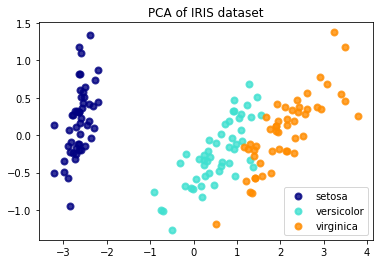

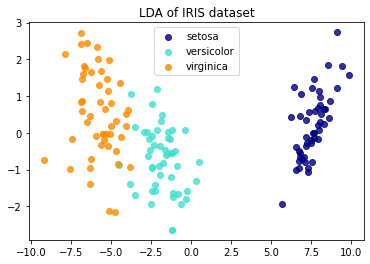

In [17]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

# 2.5.2. Kernel Principal Component Analysis (kPCA)
## Projecting data: PCA vs. KernelPCA

In [19]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

Text(0, 0.5, 'Feature #1')

Text(0.5, 0, 'Feature #0')

Text(0.5, 1.0, 'Training data')

Text(0.5, 0, 'Feature #0')

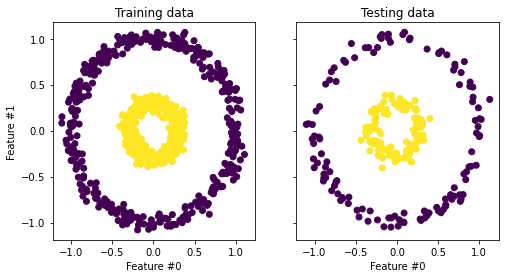

In [20]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [21]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

Text(0, 0.5, 'Feature #1')

Text(0.5, 0, 'Feature #0')

Text(0.5, 1.0, 'Testing data')

Text(0, 0.5, 'Principal component #1')

Text(0.5, 0, 'Principal component #0')

Text(0.5, 1.0, 'Projection of testing data\n using PCA')

Text(0, 0.5, 'Principal component #1')

Text(0.5, 0, 'Principal component #0')

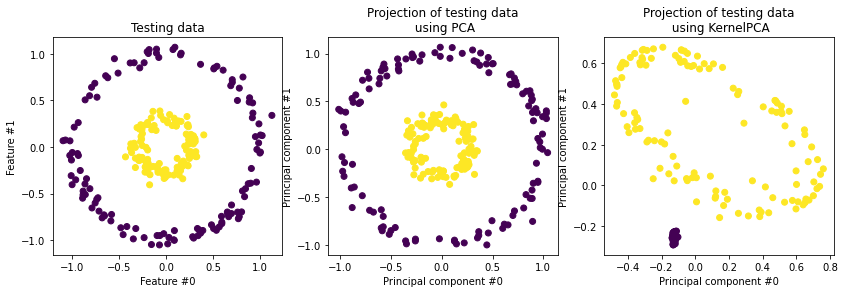

In [22]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

## Projecting into the original feature space

In [23]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

Text(0, 0.5, 'Feature #1')

Text(0.5, 0, 'Feature #0')

Text(0.5, 1.0, 'Original test data')

Text(0.5, 0, 'Feature #0')

Text(0.5, 1.0, 'Reconstruction via PCA')

Text(0.5, 0, 'Feature #0')

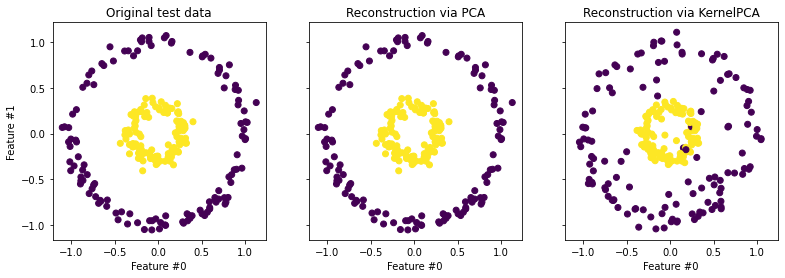

In [24]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

# End